Dataset start and end date ranges:

Streamflow Guage 09081600 = 1980-04-07 to 2020-03-31 (daily)

AMO Dataset = 1950-01-01 (starts at 1950-02-01 after differencing) to 2021-09-01 (monthly)

ENSO Dataset = 1950-01-01 to 2021-10-01 (monthly)

PDO Dataset = 1950-01-01 to 2021-10-01 (monthly)

PNA Dataset = 1950-01-01 to 2021-10-01 (monthly)

Sun Spots Dataset = 1978-01-01 to 2020-10-31 (daily)

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

## Data Analysis on One Gauge

Gauge 09081600 selected because it is within Colorado which is the primary state of focus, and the drainage size is very near the mean for the dataset of unregulated gauges.

Considering that "mean_value" is just the observations from the "value" variable averaged over the surround 7-days, decomposition will not be run because it will produce almost identical results.

In [2]:
df_gauge = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/09081600_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_gauge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14604 entries, 1980-04-07 to 2020-03-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         14604 non-null  float64
 1   jd            14604 non-null  int64  
 2   mean_value    14604 non-null  float64
 3   weibull_site  14604 non-null  float64
 4   weibull_jd    14604 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 684.6 KB


In [3]:
df_gauge.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  14604.000000  14604.000000  14604.000000  14604.000000  14604.000000
mean     300.428485    183.161668    300.428793     49.966431     49.951400
std      449.110835    105.448598    441.642785     28.862712     28.146645
min       21.300000      1.000000     27.114300      0.006844      2.439024
25%       60.000000     92.000000     60.096425     24.991445     24.390244
50%       99.050000    183.000000     99.971400     49.976045     48.780488
75%      284.000000    274.000000    285.750000     74.955513     73.170732
max     3500.000000    366.000000   2774.285700     99.952091     97.560976

In [4]:
df_gauge.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-04-07   56.0   98     54.5714     18.362877    4.878049
1980-04-08   54.0   99     55.0000     18.780371    4.878049
1980-04-09   60.0  100     55.8571     19.882280    4.878049
1980-04-10   69.0  101     58.2857     23.099035    2.439024
1980-04-11   68.0  102     60.5714     25.515023    2.439024

Text(0.5, 1.0, 'Streamflow Discharge from 1980-2020')

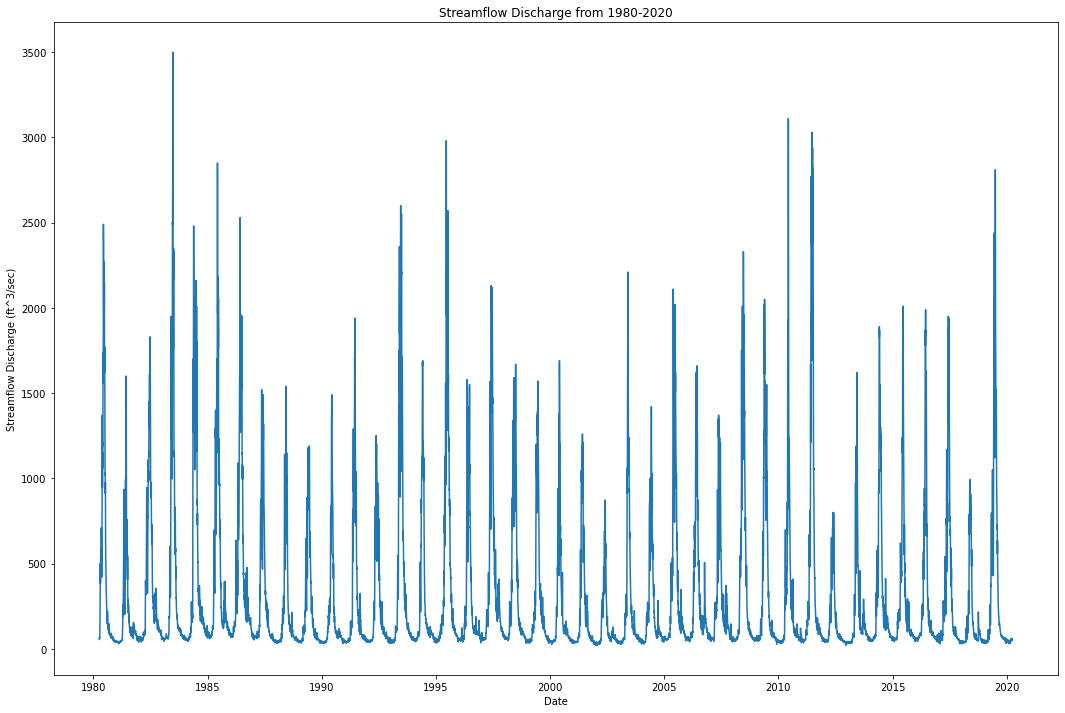

In [5]:
plt.figure(figsize=(18,12))
plt.plot(df_gauge.index, df_gauge["value"])
plt.xlabel("Date")
plt.ylabel("Streamflow Discharge (ft^3/sec)")
plt.title("Streamflow Discharge from 1980-2020")

Text(0.5, 1.0, 'Streamflow Site Percentile from 1980-2020')

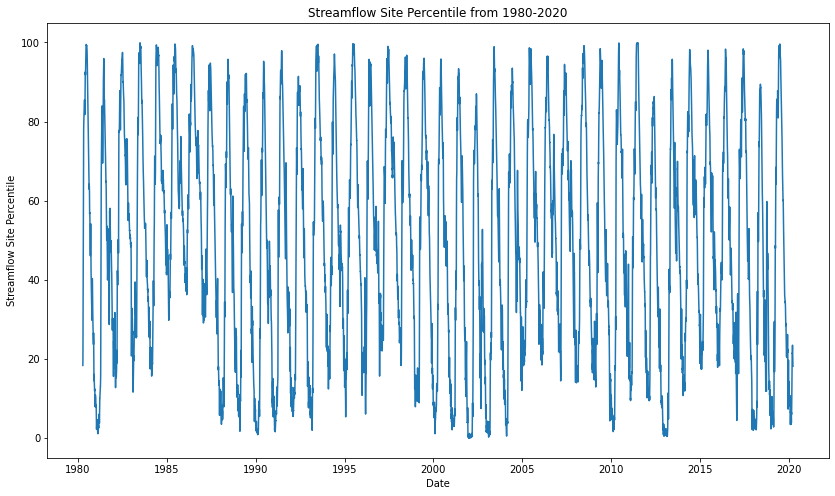

In [6]:
plt.figure(figsize=(14,8))
plt.plot(df_gauge.index, df_gauge["weibull_site"])
plt.xlabel("Date")
plt.ylabel("Streamflow Site Percentile")
plt.title("Streamflow Site Percentile from 1980-2020")

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020')

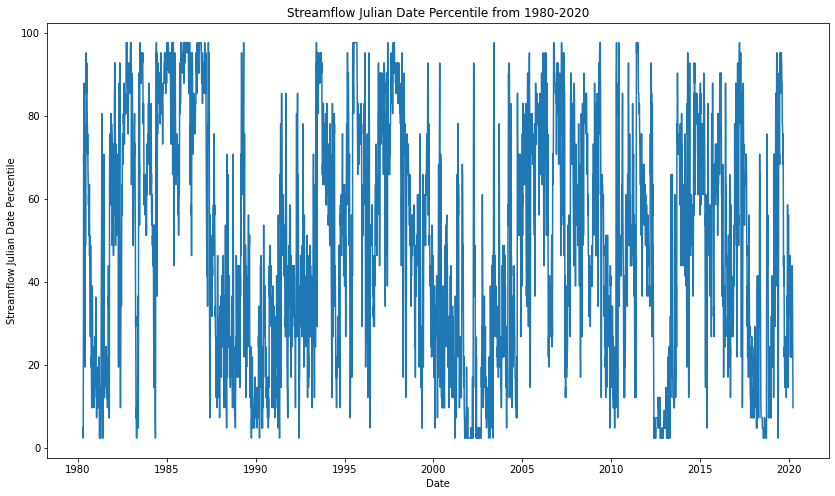

In [7]:
plt.figure(figsize=(14,8))
plt.plot(df_gauge.index, df_gauge["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020")

### Autocorrelation/Partial Autocorrelation of Each Variable

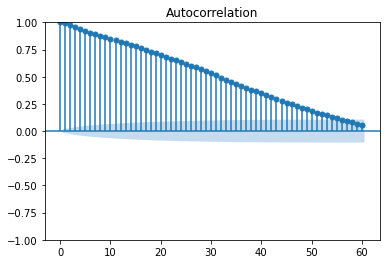

In [8]:
plot_acf(df_gauge["value"], lags=60)  # 2 months
plt.show()

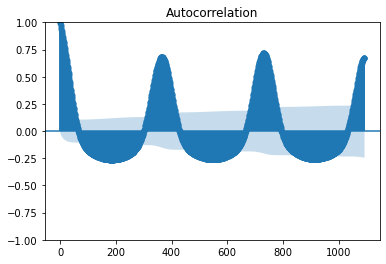

In [9]:
plot_acf(df_gauge["value"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


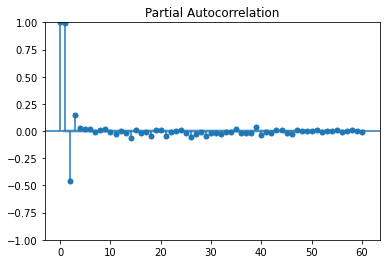

In [10]:
plot_pacf(df_gauge["value"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


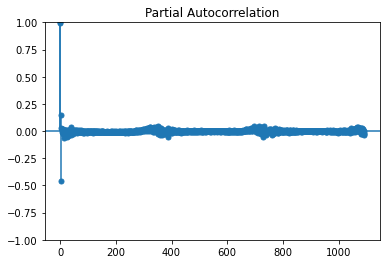

In [11]:
plot_pacf(df_gauge["value"], lags=1093)  # 3 years
plt.show()

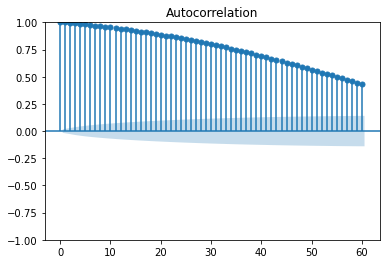

In [12]:
plot_acf(df_gauge["weibull_site"], lags=60)  # 2 months
plt.show()

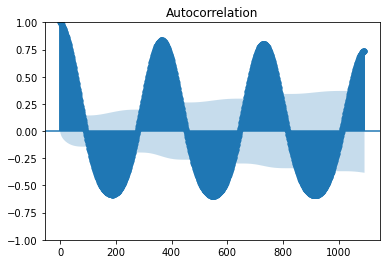

In [13]:
plot_acf(df_gauge["weibull_site"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


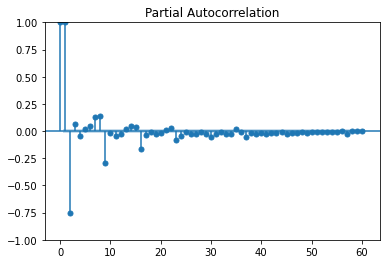

In [14]:
plot_pacf(df_gauge["weibull_site"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


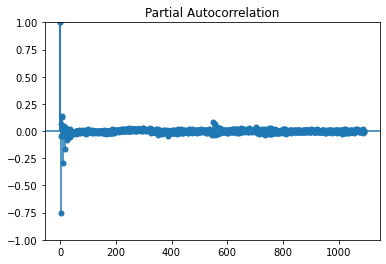

In [15]:
plot_pacf(df_gauge["weibull_site"], lags=1093)  # 3 years
plt.show()

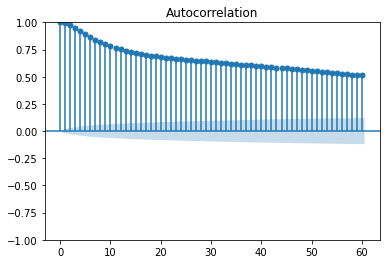

In [16]:
plot_acf(df_gauge["weibull_jd"], lags=60)  # 2 months
plt.show()

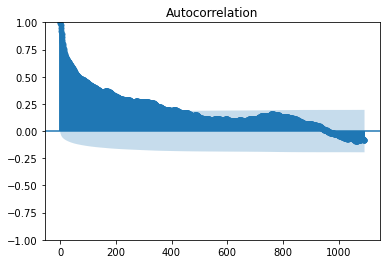

In [17]:
plot_acf(df_gauge["weibull_jd"], lags=1093)  # 3 years
plt.show()

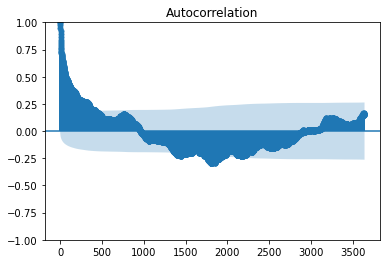

In [18]:
plot_acf(df_gauge["weibull_jd"], lags=3640)  # 10 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


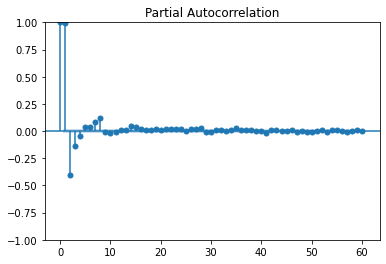

In [19]:
plot_pacf(df_gauge["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


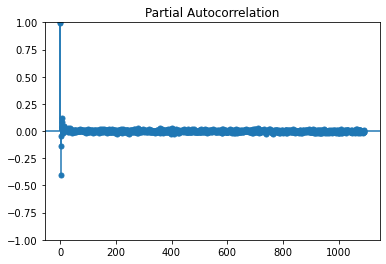

In [20]:
plot_pacf(df_gauge["weibull_jd"], lags=1093)  # 3 years
plt.show()

### Checking if Data is Stationary

In [21]:
adf = adfuller(df_gauge["value"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -13.723089
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

In [22]:
adf = adfuller(df_gauge["weibull_site"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -12.813945
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

In [23]:
adf = adfuller(df_gauge["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -7.559789
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = Auto-Selected; Variable = "value"

The function can find the natural seasonality within the data and use that as the period value of our daily data.

In [24]:
decomp = STL(df_gauge["value"]).fit()

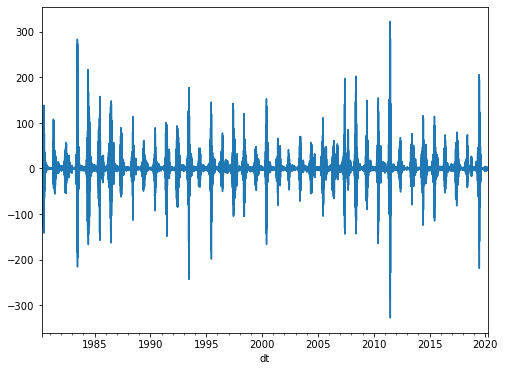

In [25]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

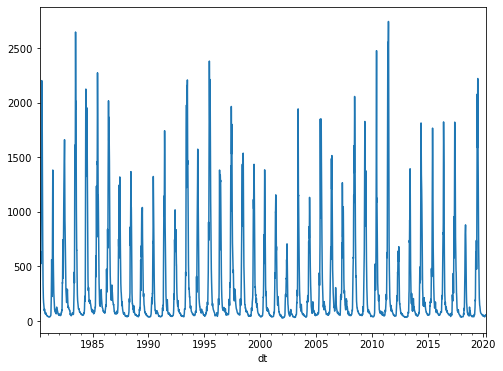

In [26]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

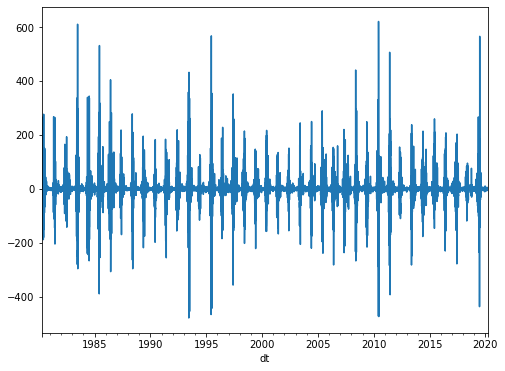

In [27]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "value"

A period of 30-days explores the monthly seasonality of our daily data.

In [28]:
decomp = STL(df_gauge["value"], period=30).fit()

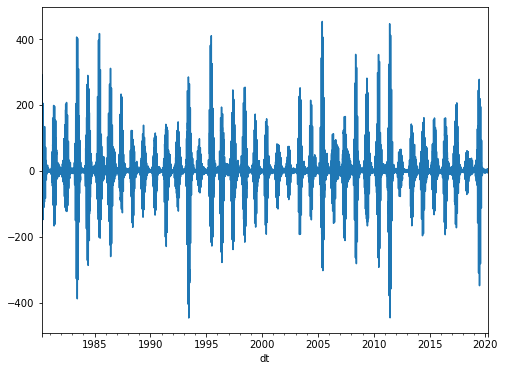

In [29]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

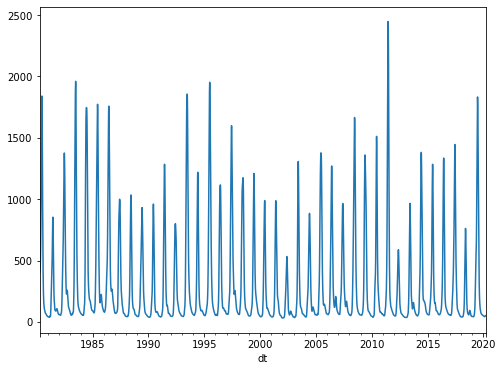

In [30]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

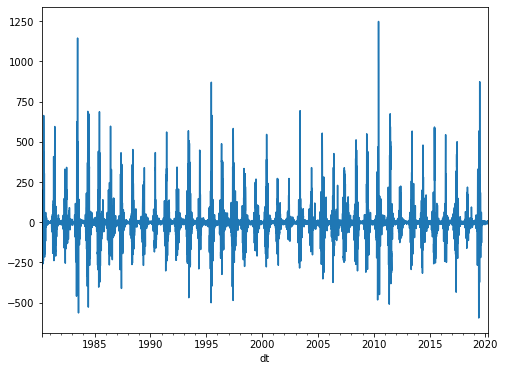

In [31]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "value"

A period of 364-days explores the yearly seasonality of our daily data.

In [32]:
decomp = STL(df_gauge["value"], period=364).fit()

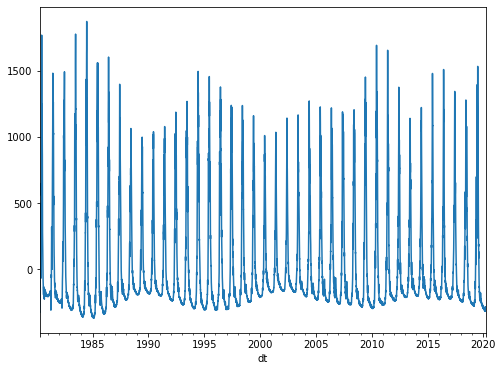

In [33]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

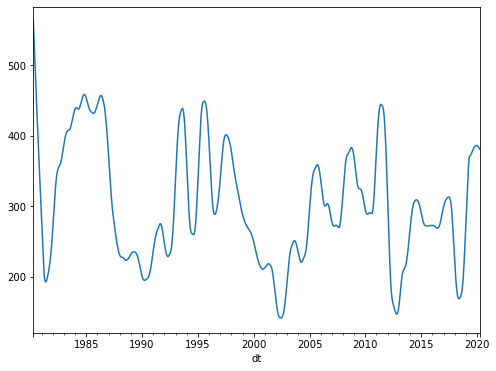

In [34]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

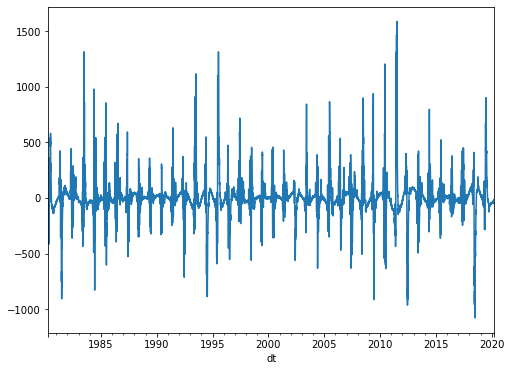

In [35]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "value"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [36]:
decomp = STL(df_gauge["value"], period=1821).fit()

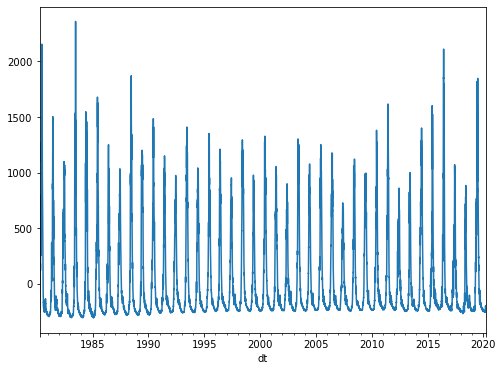

In [37]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

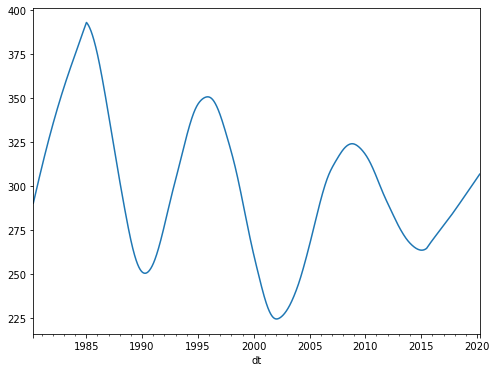

In [38]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

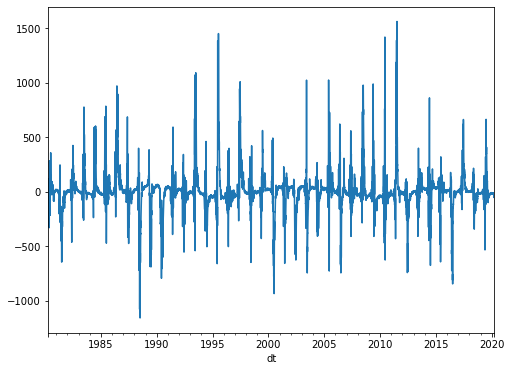

In [39]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = Auto-Selected; Variable = "weibull_site"

The function can find the natural seasonality within the data and use that as the period value of our daily data.

In [40]:
decomp = STL(df_gauge["weibull_site"]).fit()

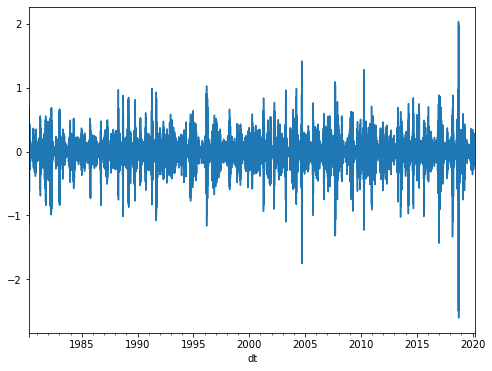

In [41]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

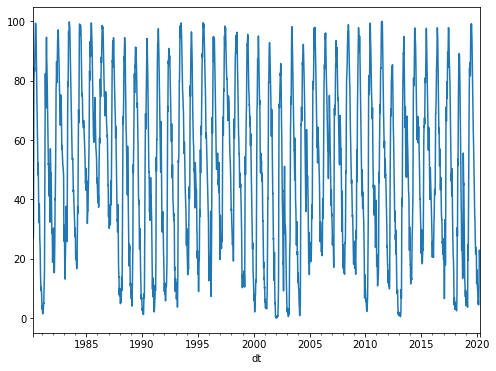

In [42]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

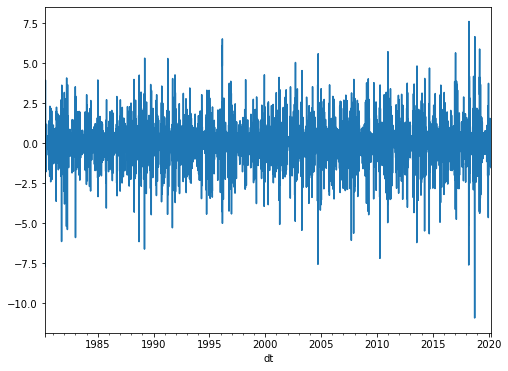

In [43]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_site"

A period of 30-days explores the monthly seasonality of our daily data.

In [44]:
decomp = STL(df_gauge["weibull_site"], period=30).fit()

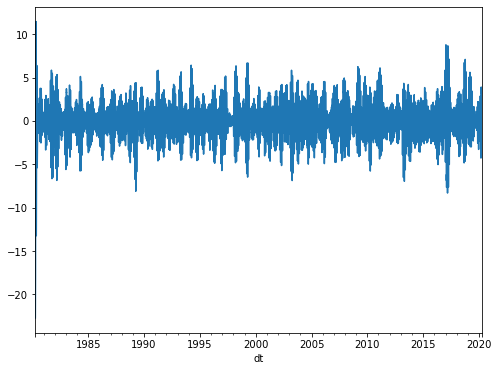

In [45]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

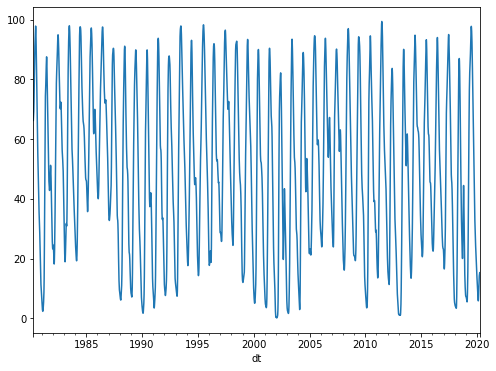

In [46]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

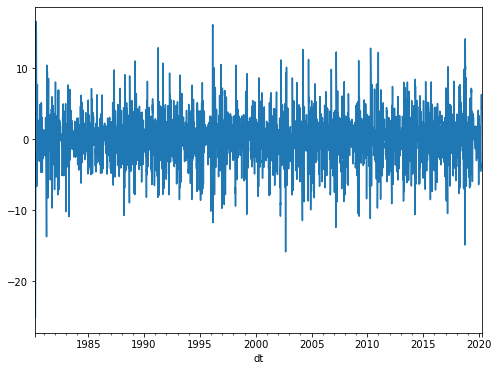

In [47]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_site"

A period of 364-days explores the yearly seasonality of our daily data.

In [48]:
decomp = STL(df_gauge["weibull_site"], period=364).fit()

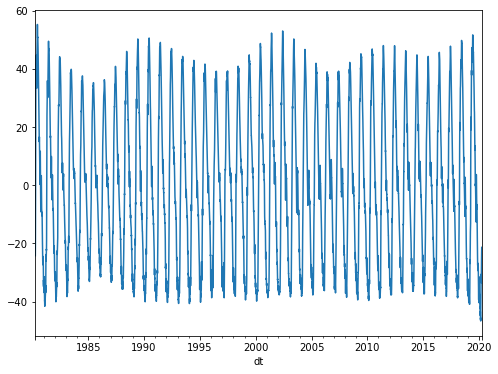

In [49]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

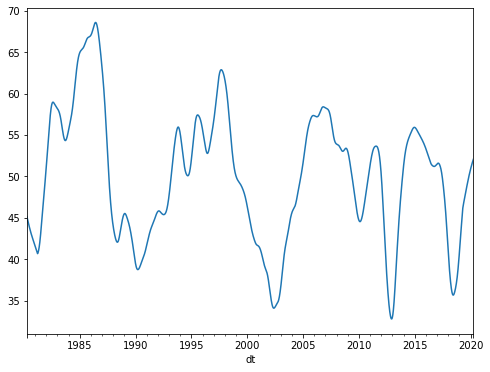

In [50]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

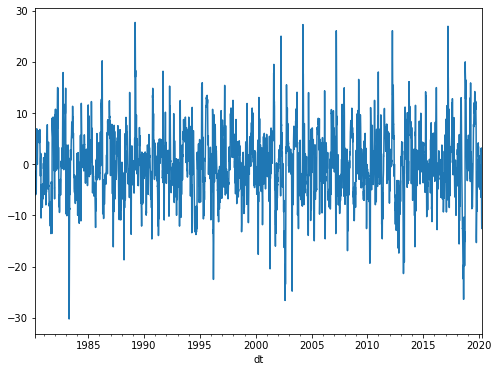

In [51]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_site"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [52]:
decomp = STL(df_gauge["weibull_site"], period=1821).fit()

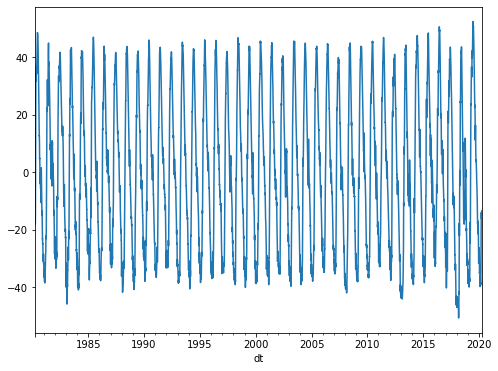

In [53]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

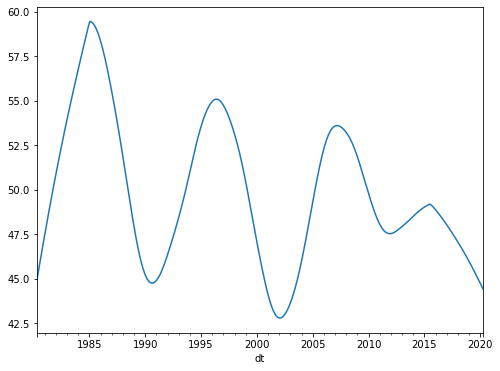

In [54]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

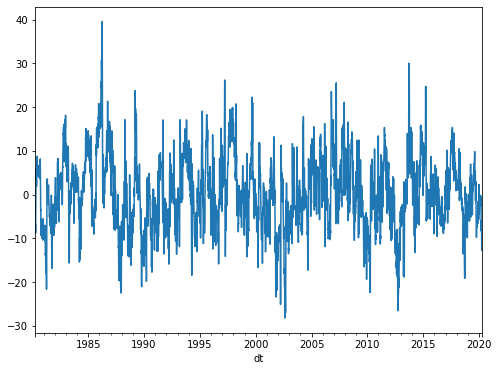

In [55]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = Auto-Selected; Variable = "weibull_jd"

The function can find the natural seasonality within the data and use that as the period value of our daily data.

In [56]:
decomp = STL(df_gauge["weibull_jd"]).fit()

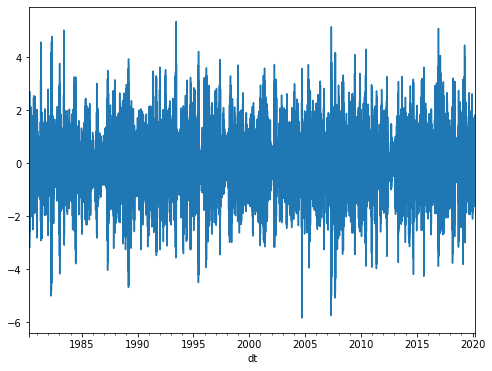

In [57]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

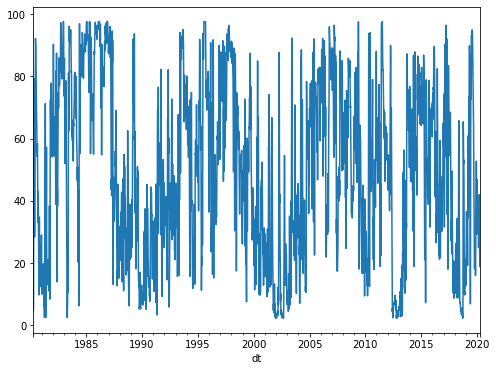

In [58]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

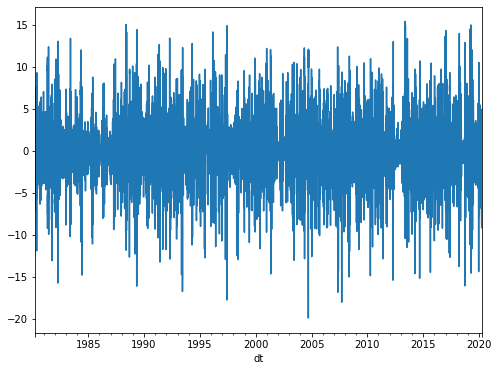

In [59]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [60]:
decomp = STL(df_gauge["weibull_jd"], period=30).fit()

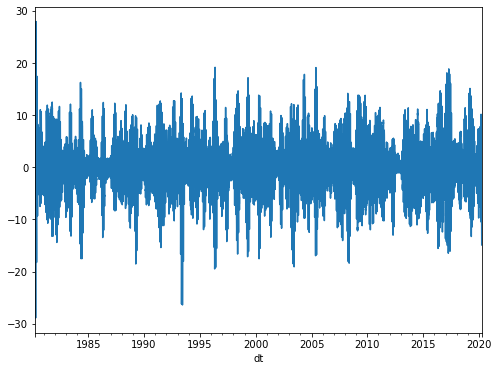

In [61]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

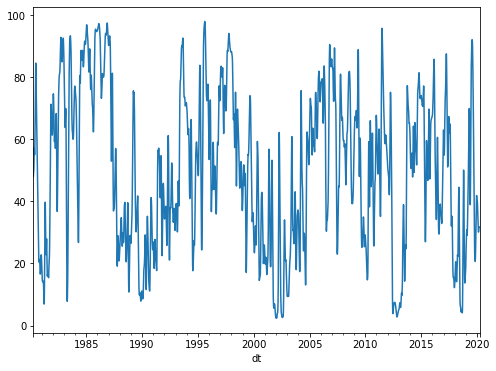

In [62]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

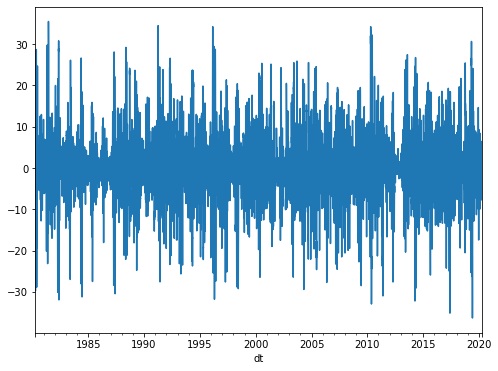

In [63]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [64]:
decomp = STL(df_gauge["weibull_jd"], period=364).fit()

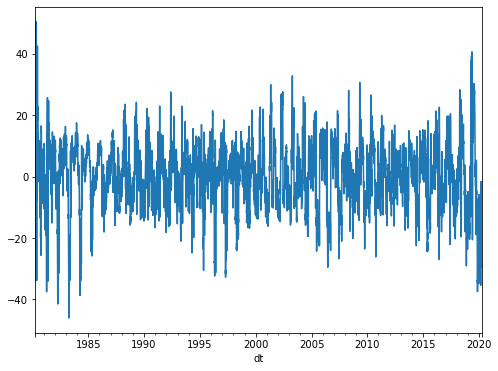

In [65]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

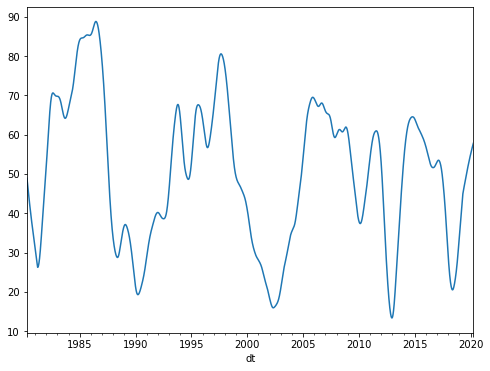

In [66]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

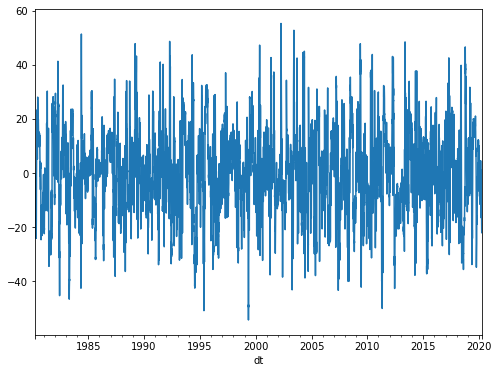

In [67]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [68]:
decomp = STL(df_gauge["weibull_jd"], period=1821).fit()

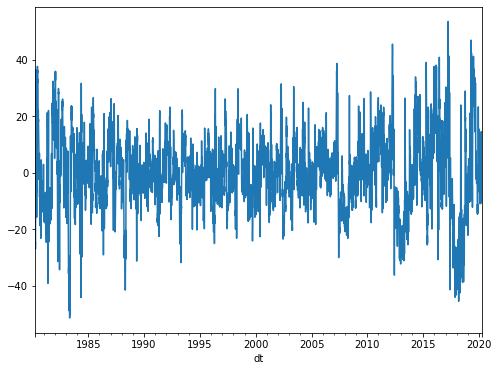

In [69]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

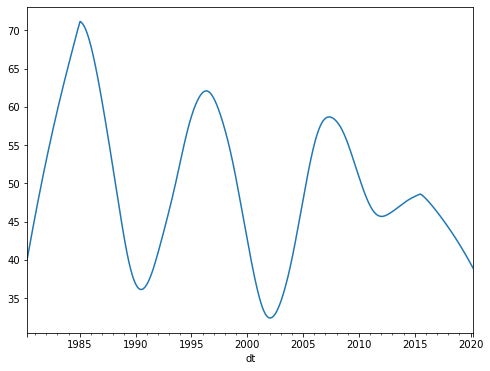

In [70]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

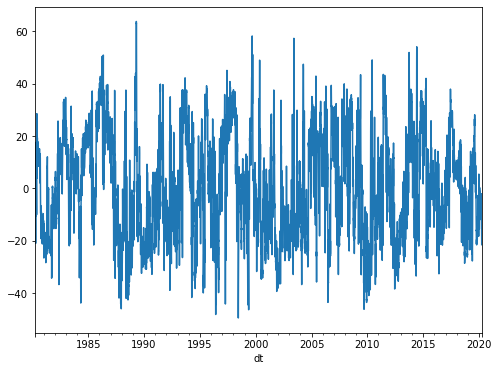

In [71]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

## Data Analysis on AMO Dataset

In [72]:
df_amo = pd.read_csv(
    "../Data/Teleconnection_Time_Series/AMO_Clean.csv",
    index_col = "Date", 
    parse_dates=True
)
df_amo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 1950-01-01 to 2021-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   861 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [73]:
df_amo.describe()

value
count  861.000000
mean    -0.004725
std      0.216120
min     -0.531000
25%     -0.163000
50%     -0.004000
75%      0.152000
max      0.513000

In [74]:
df_amo.head(5)

value
Date             
1950-01-01  0.108
1950-02-01 -0.037
1950-03-01 -0.109
1950-04-01 -0.134
1950-05-01 -0.062

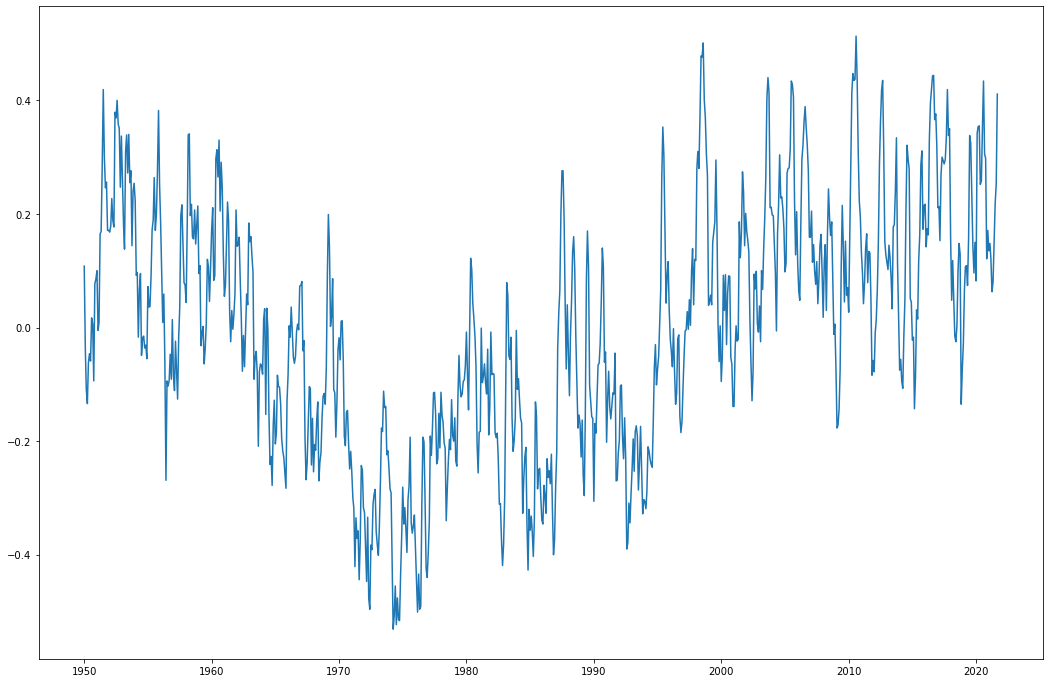

In [75]:
plt.figure(figsize=(18,12))
plt.plot(df_amo.index, df_amo["value"])

### Autocorrelation/Partial Autocorrelation of Each Variable

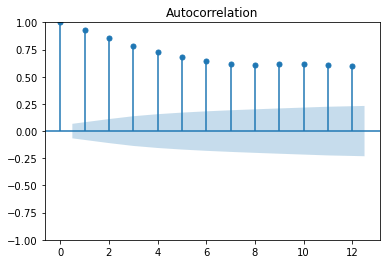

In [76]:
plot_acf(df_amo["value"], lags=12)
plt.show()

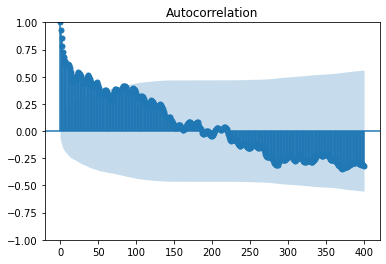

In [190]:
plot_acf(df_amo["value"], lags=400)
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


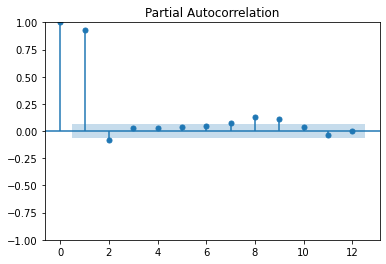

In [78]:
plot_pacf(df_amo["value"], lags=12)
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


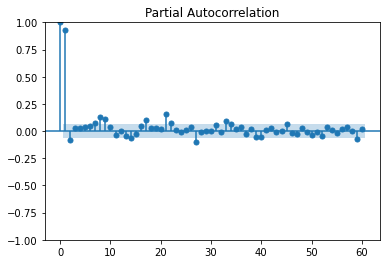

In [79]:
plot_pacf(df_amo["value"], lags=60)
plt.show()

### Checking if Data is Stationary

In [80]:
adf = adfuller(df_amo["value"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -2.002731
p-value: 0.285377
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


P-value is greater than 0.05. This dataset is not stationary.

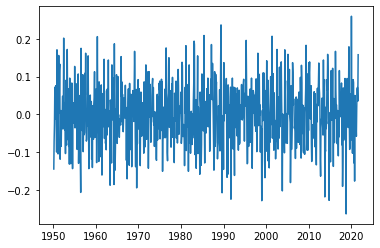

In [81]:
amo_diff = df_amo["value"].diff()[1:]
plt.plot(df_amo.index[1:], amo_diff)
plt.show()

Because differencing a time series dataset relies on having a previous observation for calculations, the first value will become NaN. We cut this value in order to run calculations on this data later.

In [82]:
amo_diff

Date
1950-02-01   -0.145
1950-03-01   -0.072
1950-04-01   -0.025
1950-05-01    0.072
1950-06-01    0.016
              ...  
2021-05-01    0.017
2021-06-01    0.067
2021-07-01    0.071
2021-08-01    0.035
2021-09-01    0.158
Name: value, Length: 860, dtype: float64

In [83]:
adf = adfuller(amo_diff)
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -10.516438
p-value: 0.000000
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


The p-value now rounds to 0.00, meaning that we have successfully transformed our non-stationary data into a stationary dataset.

In [84]:
amo_diff.to_csv("../Data/Teleconnection_Time_Series/AMO_Clean_Diff.csv", index=False)

### Decomposition: Period = 12-months; Difference Transformed

A period of 12-months explores the yearly seasonality of our monthly data. Done using difference transformed dataset.

In [85]:
decomp = STL(amo_diff, period=12).fit()

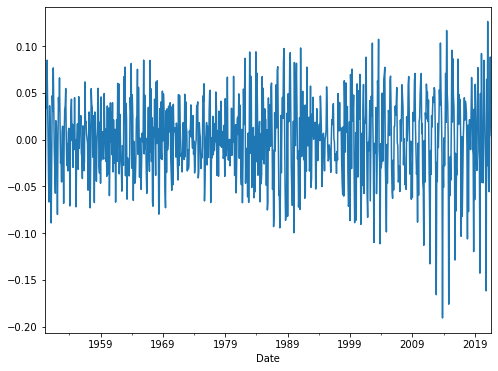

In [86]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

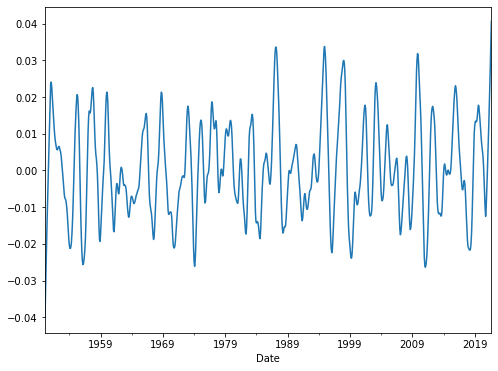

In [87]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

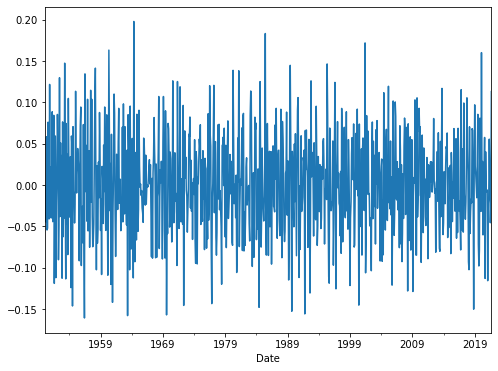

In [88]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 60-months; Difference Transformed

A period of 60-months explores the 5-yearly seasonality of our monthly data. Done using difference transformed dataset.

In [225]:
decomp = STL(amo_diff, period=60).fit()

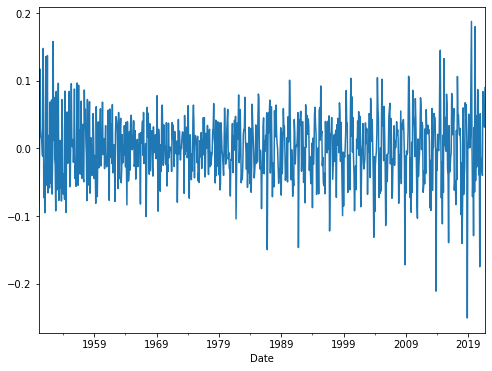

In [226]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

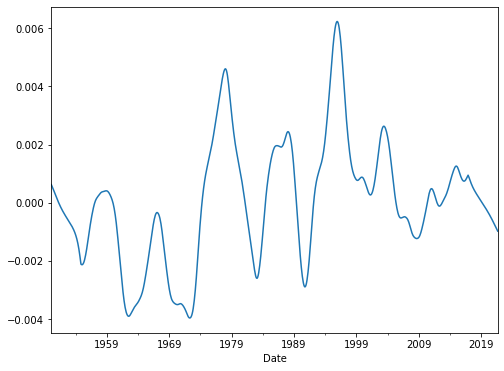

In [227]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

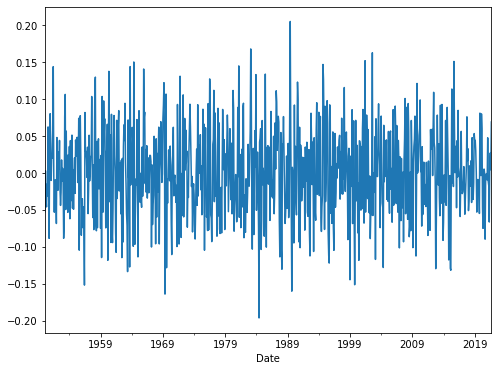

In [228]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 12-months

A period of 12-months explores the yearly seasonality of our monthly data.

In [211]:
decomp = STL(df_amo["value"], period=12).fit()

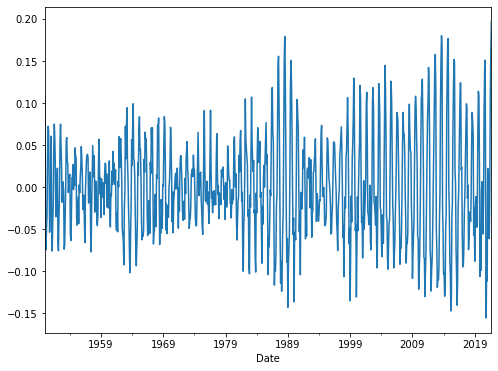

In [212]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

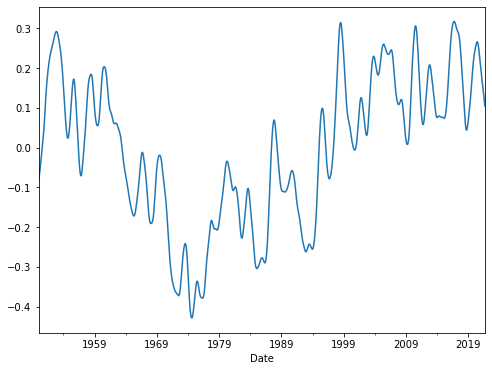

In [213]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

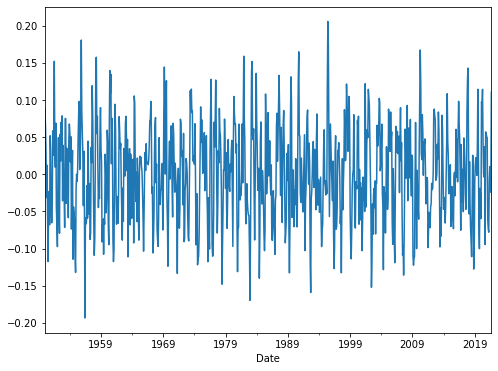

In [214]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 60-months

A period of 60-months explores the 5-yearly seasonality of our monthly data.

In [97]:
decomp = STL(df_amo["value"], period=60).fit()

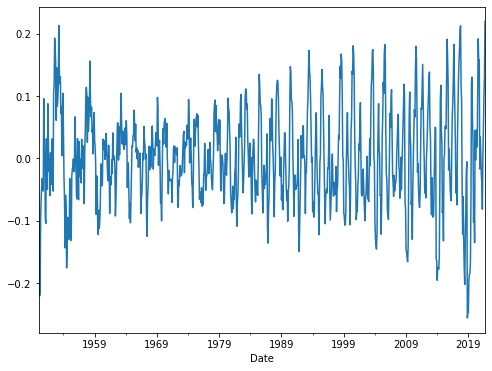

In [98]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

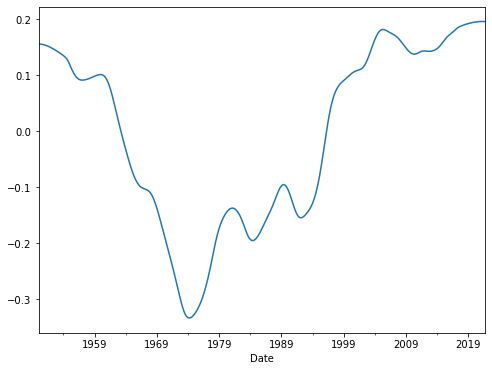

In [99]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

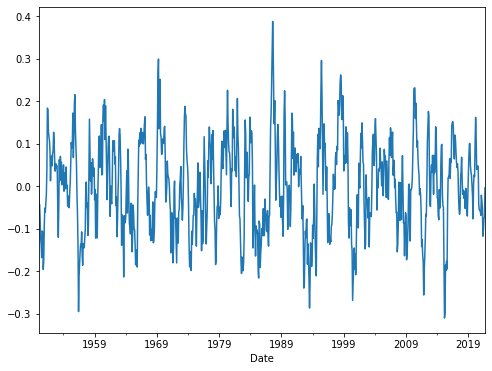

In [100]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

## Data Analysis on ENSO Dataset

In [101]:
df_enso = pd.read_csv(
    "../Data/Teleconnection_Time_Series/ENSO_Clean.csv",
    index_col = "Date", 
    parse_dates=True
)
df_enso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 1950-01-01 to 2021-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   862 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [102]:
df_enso.describe()

value
count  862.000000
mean    26.896473
std      0.981801
min     24.250000
25%     26.220000
50%     26.980000
75%     27.570000
max     29.420000

In [103]:
df_enso.head(5)

value
Date             
1950-01-01  24.55
1950-02-01  25.06
1950-03-01  25.87
1950-04-01  26.28
1950-05-01  26.18

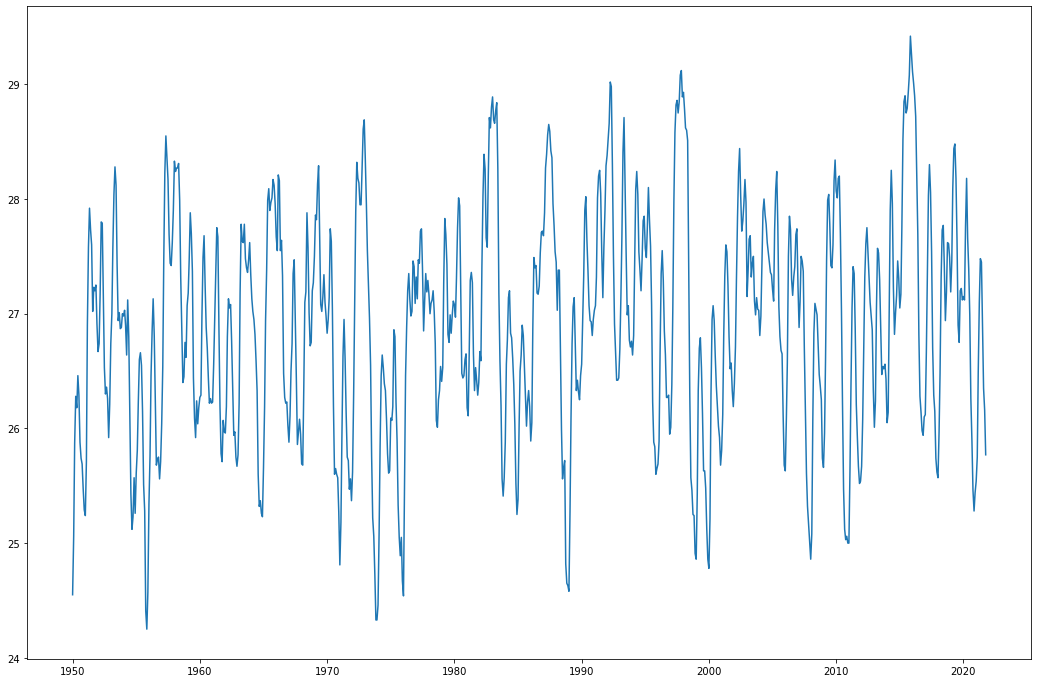

In [104]:
plt.figure(figsize=(18,12))
plt.plot(df_enso.index, df_enso["value"])

### Autocorrelation/Partial Autocorrelation of Each Variable

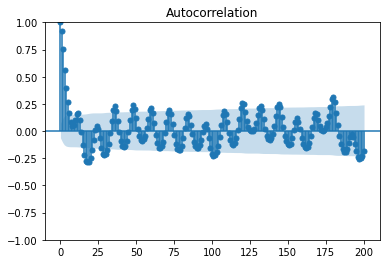

In [189]:
plot_acf(df_enso["value"], lags=400)
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


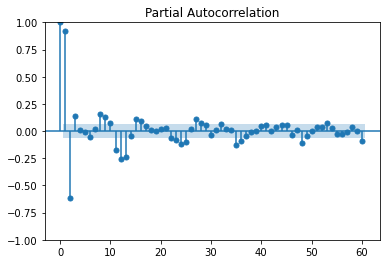

In [106]:
plot_pacf(df_enso["value"], lags=60)
plt.show()

### Checking if Data is Stationary

In [107]:
adf = adfuller(df_enso["value"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -6.947694
p-value: 0.000000
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


P-value rounds to 0.00, so this dataset is stationary.

### Decomposition: Period = Auto-Selected

The function can find the natural seasonality within the data and use that as the period value of our monthly data.

In [108]:
decomp = STL(df_enso["value"]).fit()

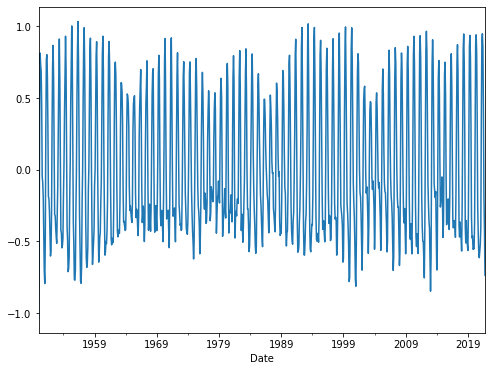

In [109]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

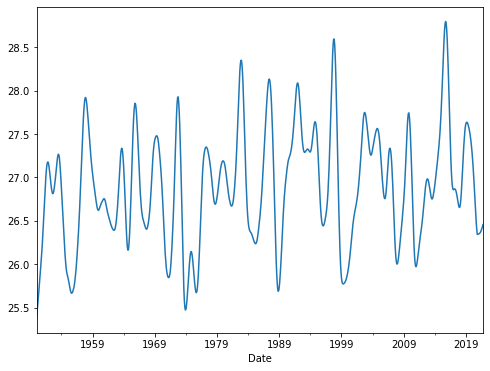

In [110]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

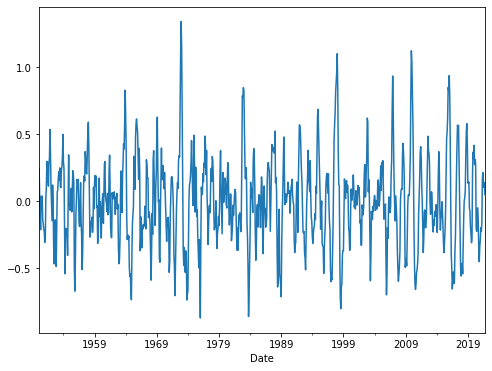

In [111]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 12-months

A period of 12-months explores the yearly seasonality of our monthly data.

In [112]:
decomp = STL(df_enso["value"], period=12).fit()

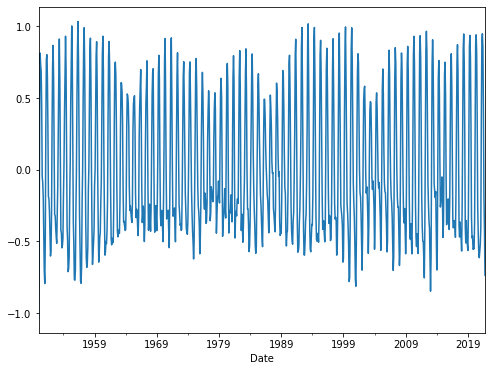

In [113]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

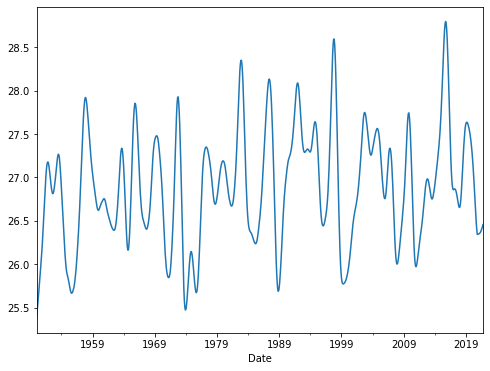

In [114]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

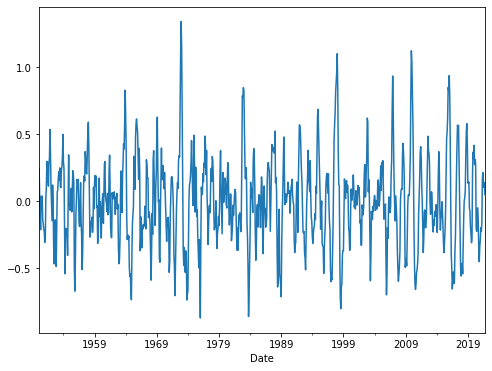

In [115]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 60-months

A period of 60-months explores the 5-yearly seasonality of our monthly data.

In [116]:
decomp = STL(df_enso["value"], period=60).fit()

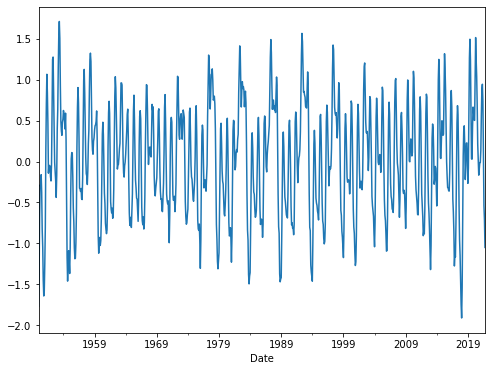

In [117]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

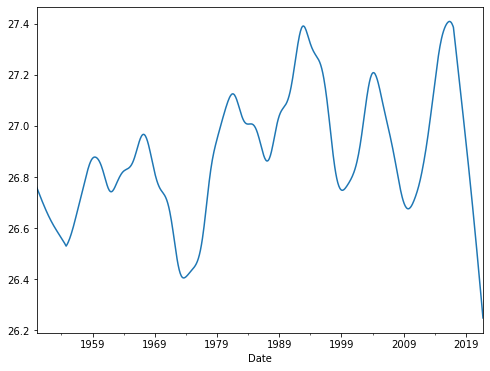

In [118]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

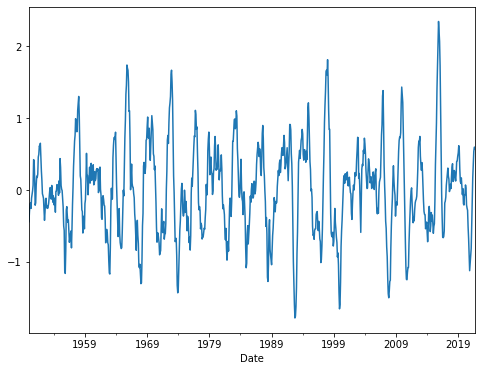

In [119]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

## Data Analysis on PDO Dataset

In [120]:
df_pdo = pd.read_csv(
    "../Data/Teleconnection_Time_Series/PDO_Clean.csv",
    index_col = "Date", 
    parse_dates=True
)
df_pdo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 1950-01-01 to 2021-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   862 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [121]:
df_pdo.describe()

value
count  862.000000
mean    -0.142144
std      0.944523
min     -2.648000
25%     -0.831250
50%     -0.142000
75%      0.537250
max      2.382000

In [122]:
df_pdo.head(5)

value
Date             
1950-01-01 -1.317
1950-02-01 -1.654
1950-03-01 -1.346
1950-04-01 -1.402
1950-05-01 -2.423

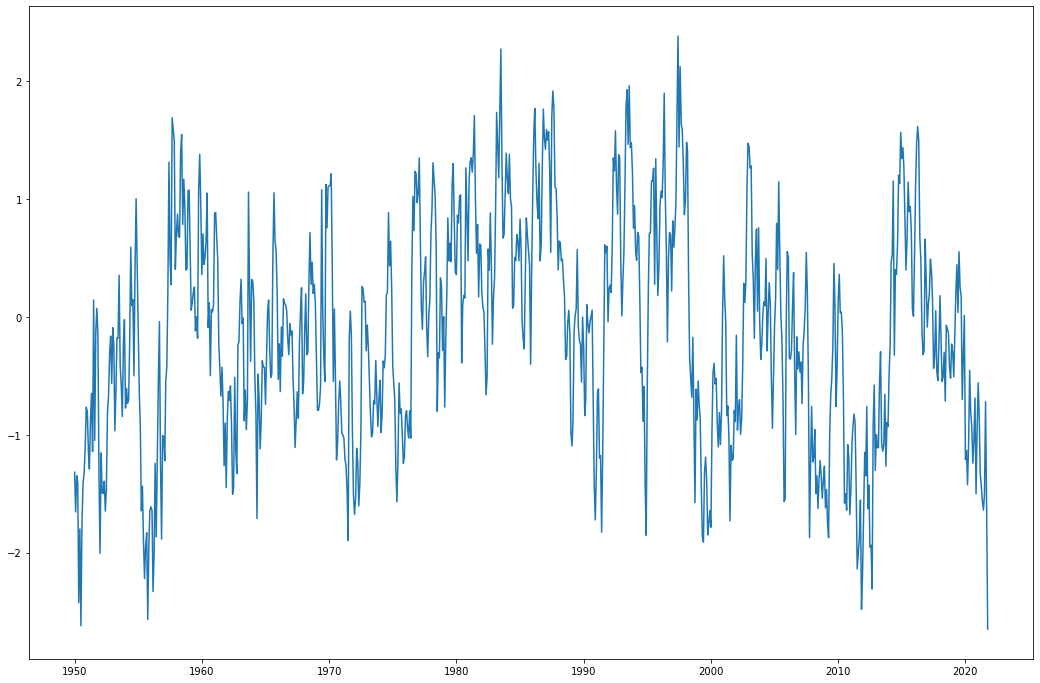

In [123]:
plt.figure(figsize=(18,12))
plt.plot(df_pdo.index, df_pdo["value"])

### Autocorrelation/Partial Autocorrelation of Each Variable

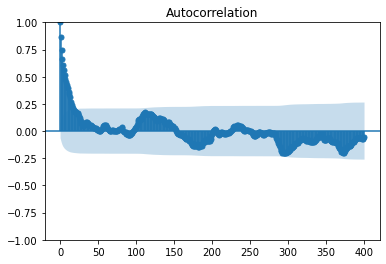

In [192]:
plot_acf(df_pdo["value"], lags=400)
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


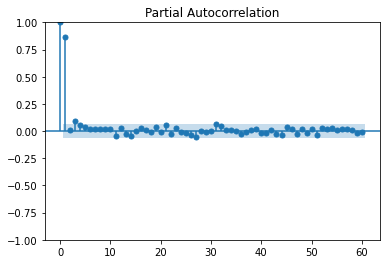

In [125]:
plot_pacf(df_pdo["value"], lags=60)
plt.show()

### Checking if Data is Stationary

In [126]:
adf = adfuller(df_pdo["value"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -5.984672
p-value: 0.000000
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


P-value rounds to 0.00, so this dataset is stationary.

### Decomposition: Period = Auto-Selected

The function can find the natural seasonality within the data and use that as the period value of our monthly data.

In [127]:
decomp = STL(df_pdo["value"]).fit()

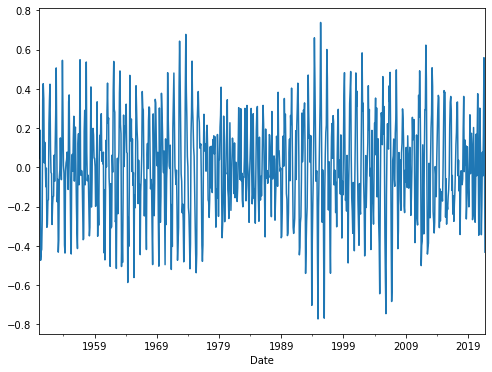

In [128]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

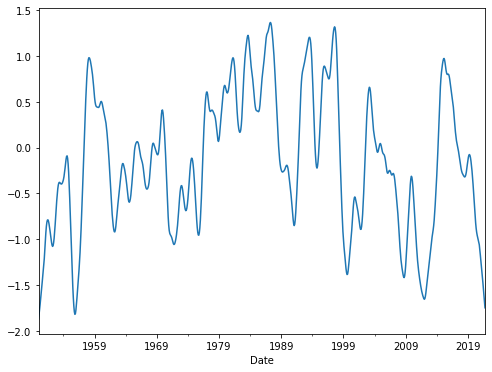

In [129]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

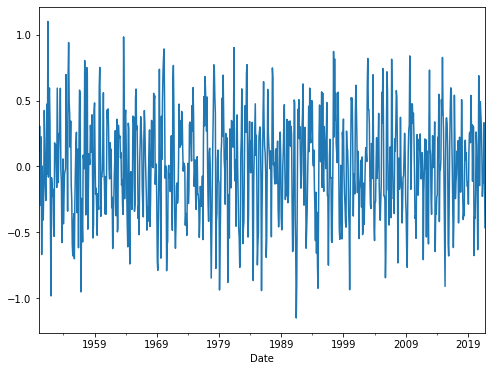

In [130]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 12-months

A period of 12-months explores the yearly seasonality of our monthly data.

In [131]:
decomp = STL(df_pdo["value"], period=12).fit()

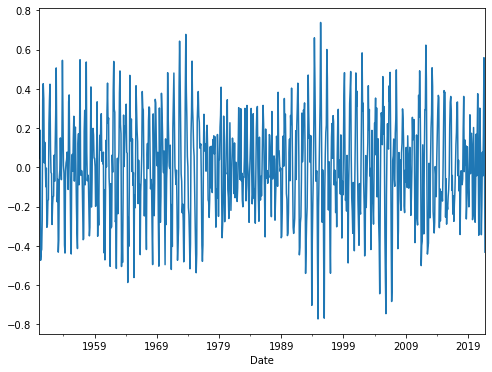

In [132]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

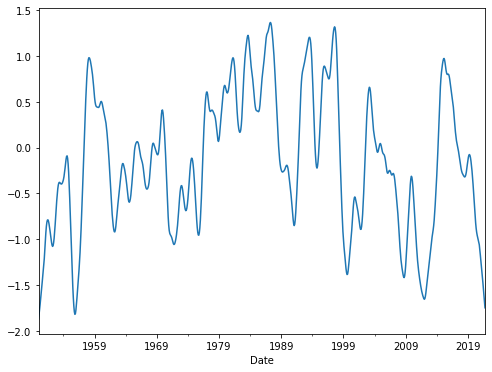

In [133]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

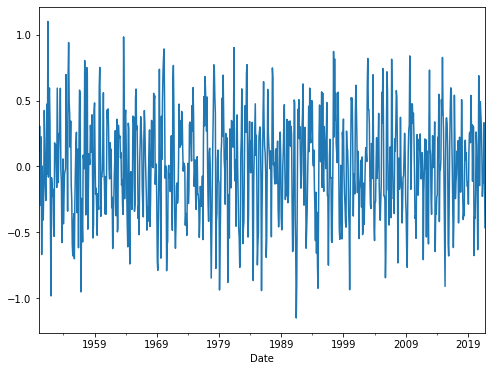

In [134]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 60-months

A period of 60-months explores the 5-yearly seasonality of our monthly data.

In [135]:
decomp = STL(df_pdo["value"], period=60).fit()

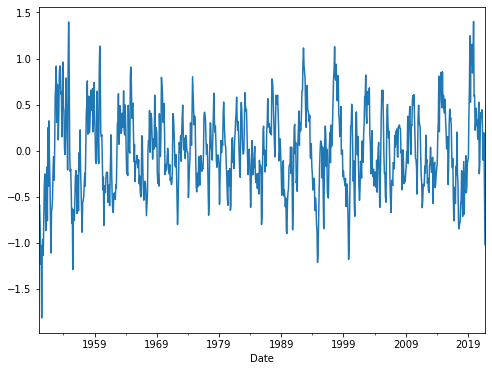

In [136]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

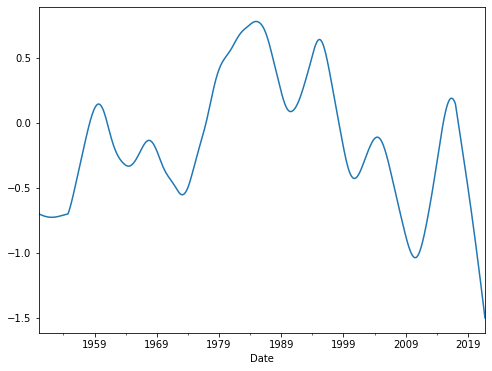

In [137]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

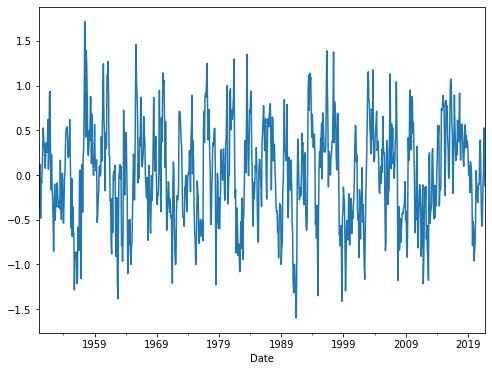

In [138]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

## Data Analysis on PNA Dataset

In [139]:
df_pna = pd.read_csv(
    "../Data/Teleconnection_Time_Series/PNA_Clean.csv",
    index_col = "Date", 
    parse_dates=True
)
df_pna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 1950-01-01 to 2021-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   862 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [140]:
df_pna.describe()

value
count  862.000000
mean    -0.105406
std      1.034244
min     -3.650000
25%     -0.787500
50%     -0.080000
75%      0.600000
max      2.870000

In [141]:
df_pna.head(5)

value
Date             
1950-01-01  -3.65
1950-02-01  -1.69
1950-03-01  -0.06
1950-04-01  -0.23
1950-05-01  -0.40

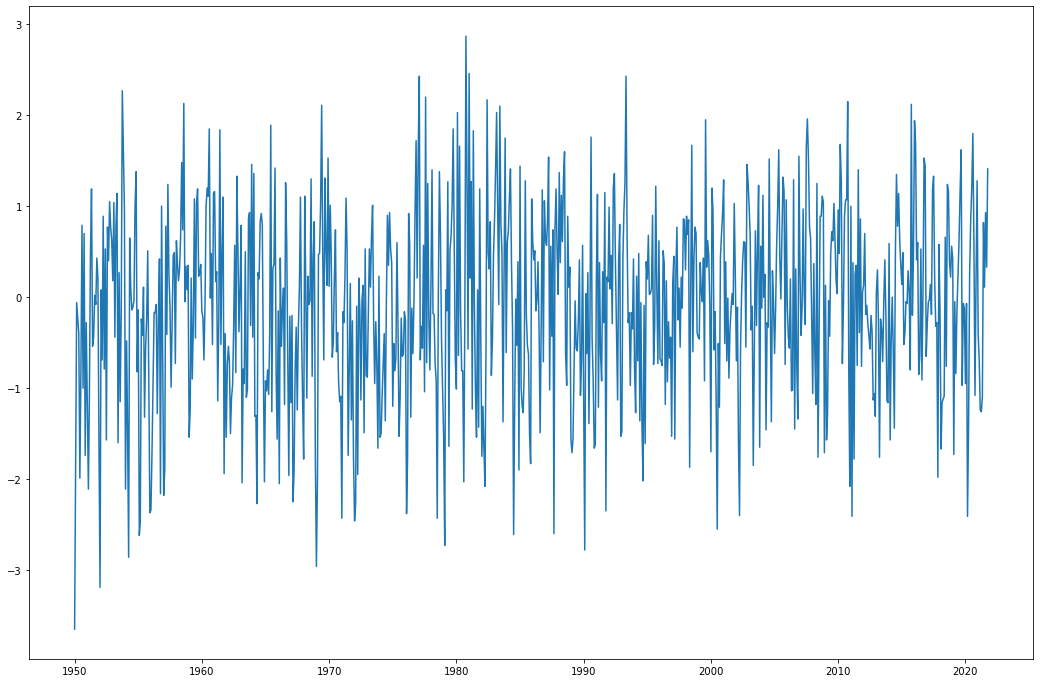

In [142]:
plt.figure(figsize=(18,12))
plt.plot(df_pna.index, df_pna["value"])

### Autocorrelation/Partial Autocorrelation of Each Variable

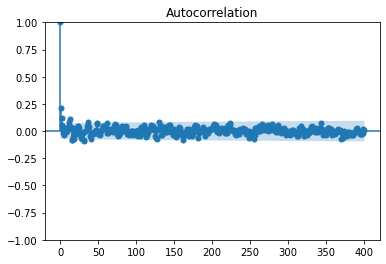

In [184]:
plot_acf(df_pna["value"], lags=400)
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


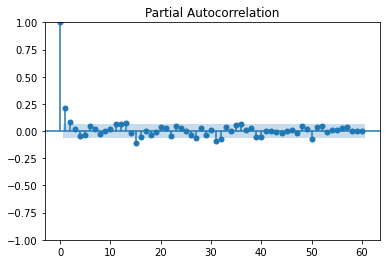

In [144]:
plot_pacf(df_pna["value"], lags=60)
plt.show()

### Checking if Data is Stationary

In [145]:
adf = adfuller(df_pna["value"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -7.104661
p-value: 0.000000
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


P-value rounds to 0.00, so this dataset is stationary.

### Decomposition: Period = Auto-Selected

The function can find the natural seasonality within the data and use that as the period value of our monthly data.

In [146]:
decomp = STL(df_pna["value"]).fit()

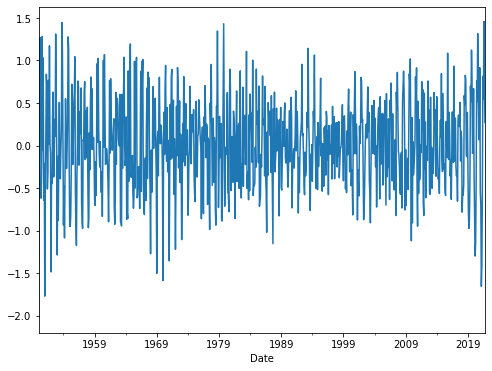

In [147]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

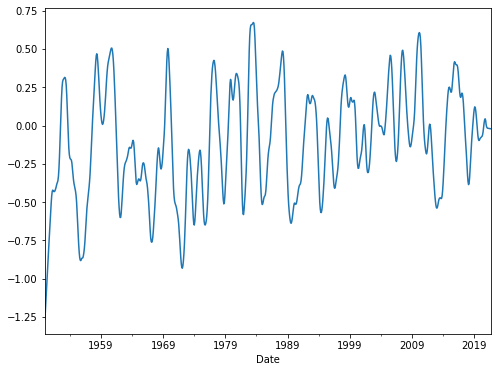

In [148]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

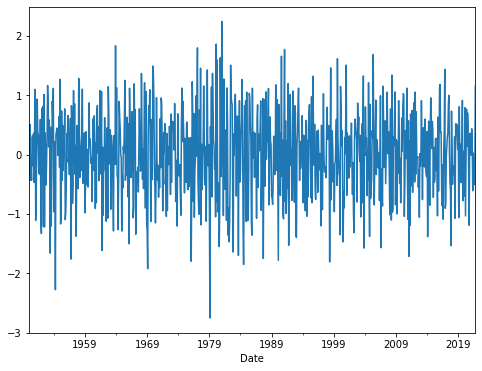

In [149]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 12-months

A period of 12-months explores the yearly seasonality of our monthly data.

In [150]:
decomp = STL(df_pna["value"], period=12).fit()

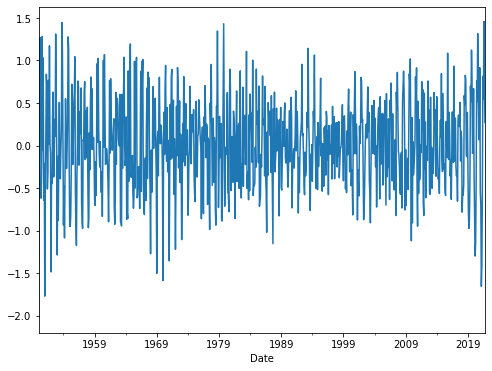

In [151]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

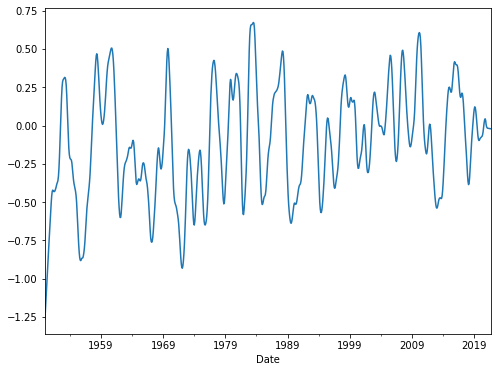

In [152]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

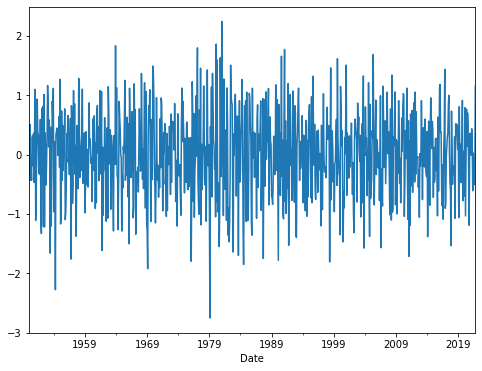

In [153]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 60-months

A period of 60-months explores the 5-yearly seasonality of our monthly data.

In [154]:
decomp = STL(df_pna["value"], period=60).fit()

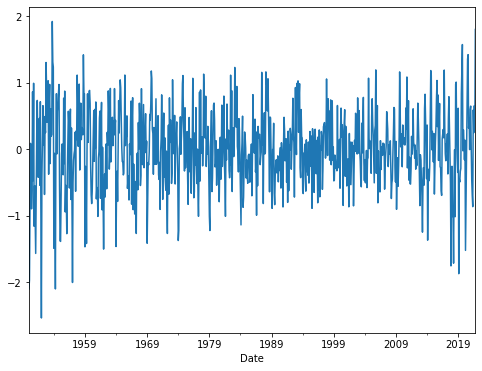

In [155]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

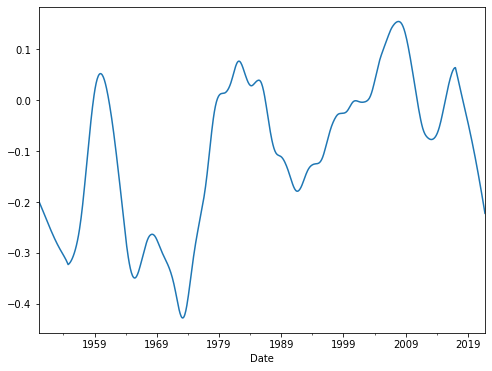

In [156]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

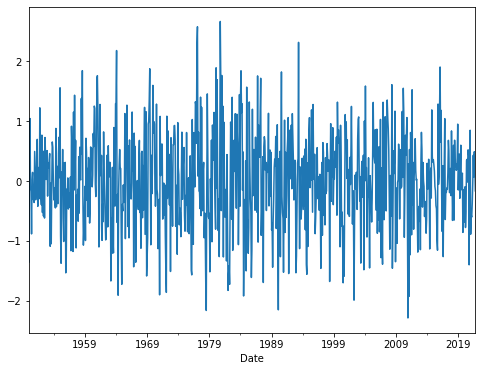

In [157]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

## Data Analysis on Sun Spots Dataset

In [158]:
df_sun = pd.read_csv(
    "../Data/Teleconnection_Time_Series/Sun_Spots_Clean.csv",
    index_col = "Date", 
    parse_dates=True
)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sun_spots_north  15645 non-null  float64
 1   sun_spots_south  15645 non-null  float64
dtypes: float64(2)
memory usage: 366.7 KB


In [159]:
df_sun.describe()

sun_spots_north  sun_spots_south
count     15645.000000     15645.000000
mean         41.783726        45.367715
std          45.956758        47.145307
min           0.000000         0.000000
25%           0.000000         0.000000
50%          26.000000        32.000000
75%          66.000000        73.000000
max         286.200000       294.500000

In [160]:
df_sun.head(5)

sun_spots_north  sun_spots_south
Date                                        
1978-01-01             50.9             76.1
1978-01-02             65.5             67.5
1978-01-03             94.7             52.3
1978-01-04            109.4             36.6
1978-01-05             82.8             46.2

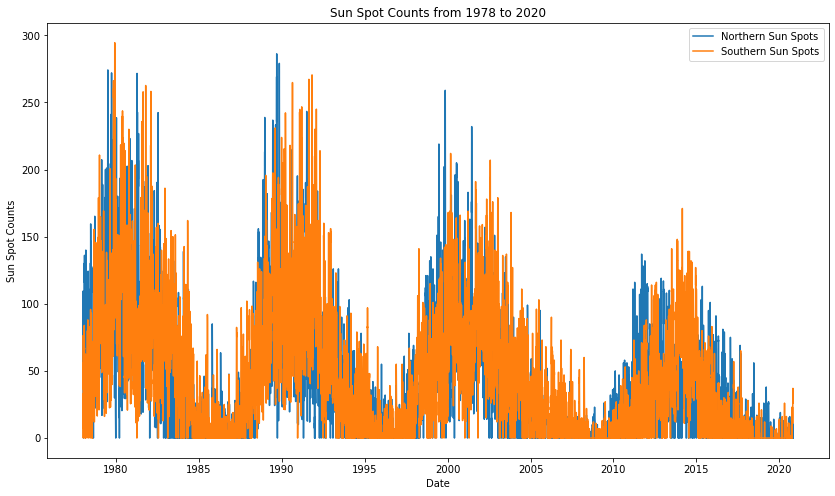

In [161]:
plt.figure(figsize=(14,8))
plt.plot(df_sun.index, df_sun["sun_spots_north"], label="Northern Sun Spots")
plt.plot(df_sun.index, df_sun["sun_spots_south"], label="Southern Sun Spots")
plt.title("Sun Spot Counts from 1978 to 2020")
plt.xlabel("Date")
plt.ylabel("Sun Spot Counts")
plt.legend()
plt.show()

These data seem to follow the same trends, so to avoid redundancy analysis will be done on only one.

### Autocorrelation/Partial Autocorrelation of Each Variable

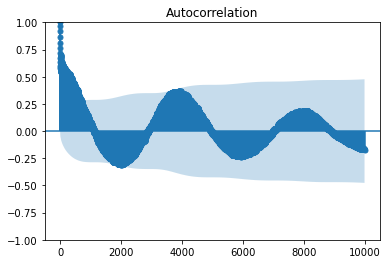

In [194]:
plot_acf(df_sun["sun_spots_north"], lags=10000)
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


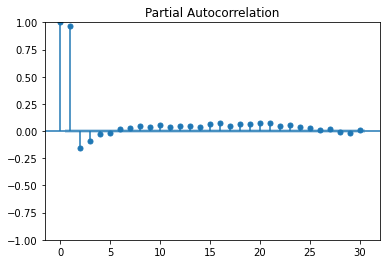

In [163]:
plot_pacf(df_sun["sun_spots_north"], lags=30)
plt.show()

### Checking if Data is Stationary

In [164]:
adf = adfuller(df_sun["sun_spots_north"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -5.708899
p-value: 0.000001
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value is less than 0.01, so this dataset is stationary.

### Decomposition: Period = Auto-Selected

The function can find the natural seasonality within the data and use that as the period value of our daily data.

In [165]:
decomp = STL(df_sun["sun_spots_north"]).fit()

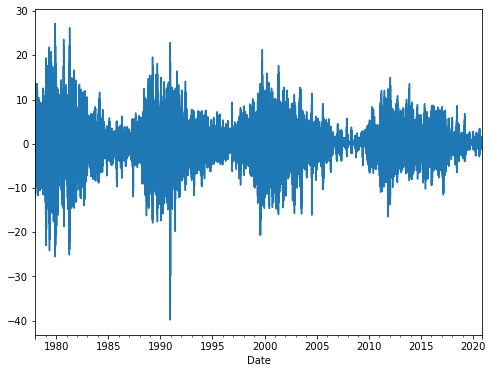

In [166]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

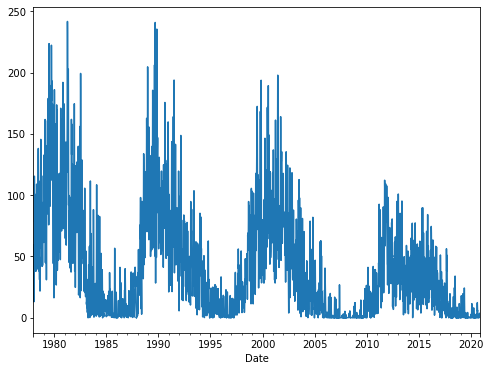

In [167]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

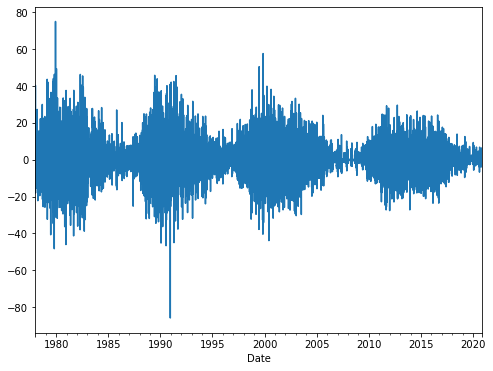

In [168]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 30-days

A period of 30-days explores the monthly seasonality of our daily data.

In [169]:
decomp = STL(df_sun["sun_spots_north"], period=30).fit()

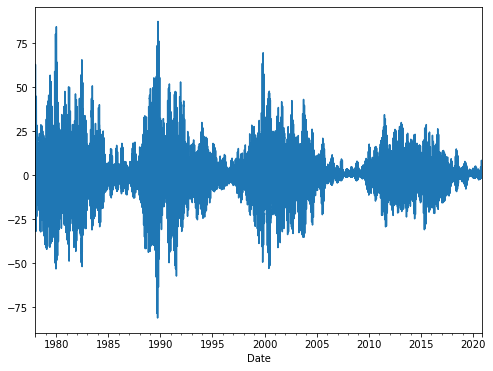

In [170]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

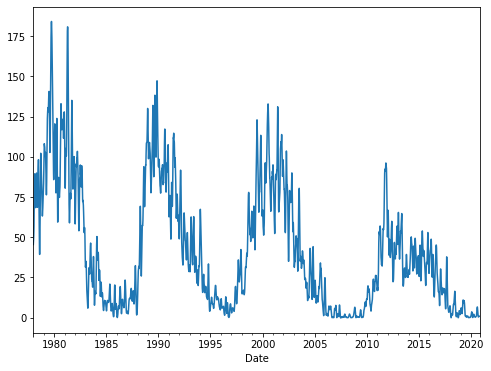

In [171]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

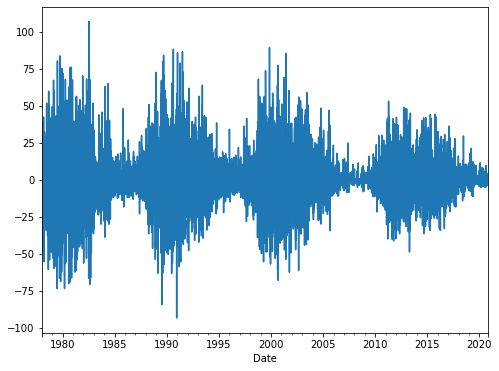

In [172]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 364-days

A period of 364-days explores the yearly seasonality of our daily data.

In [173]:
decomp = STL(df_sun["sun_spots_north"], period=364).fit()

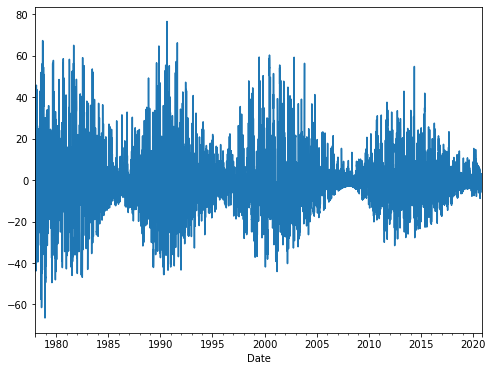

In [174]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

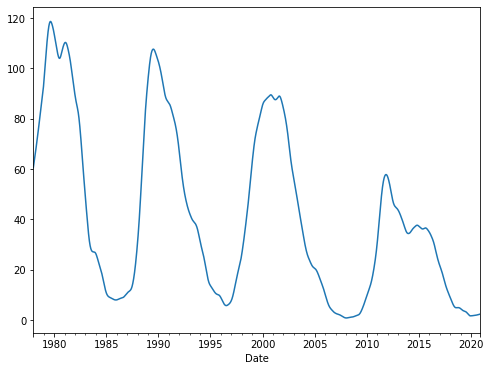

In [175]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

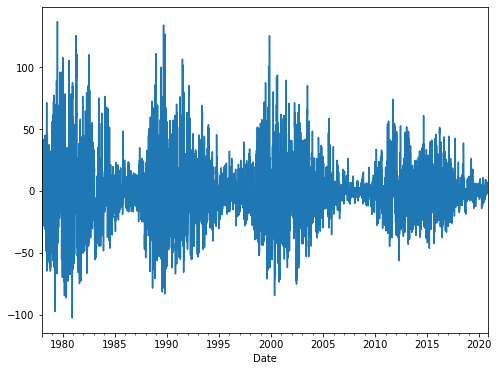

In [176]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()

### Decomposition: Period = 1821-days

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [177]:
decomp = STL(df_sun["sun_spots_north"], period=1821).fit()

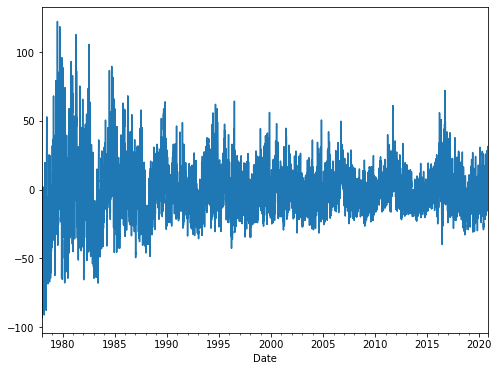

In [178]:
plt.figure(figsize=(8,6))
decomp.seasonal.plot()
plt.show()

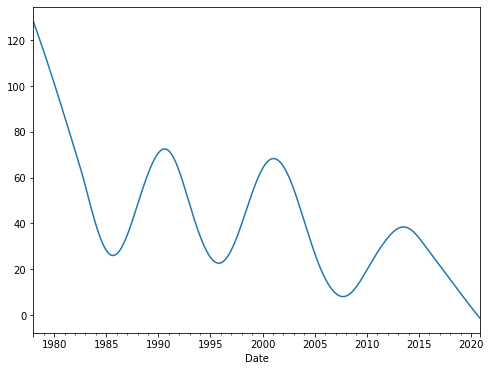

In [179]:
plt.figure(figsize=(8,6))
decomp.trend.plot()
plt.show()

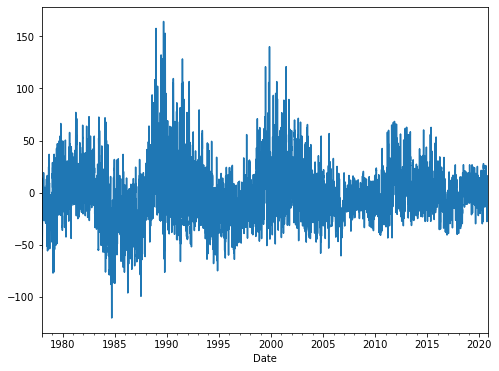

In [180]:
plt.figure(figsize=(8,6))
decomp.resid.plot()
plt.show()